In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

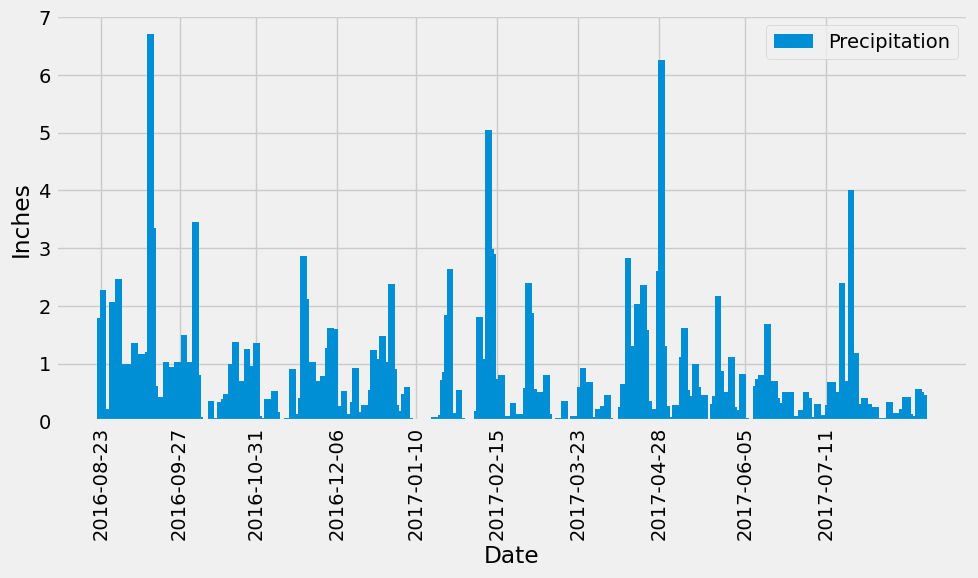

In [70]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent = '2017-08-23'
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
one_year_precip = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date >= year_ago).\
                        order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(one_year_precip, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df = df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Precipitation'], label='Precipitation', width=3)
plt.xlabel('Date')
plt.ylabel('Inches')

interval_index = int(len(df) * 0.1)
xticks_positions = range(0, len(df), interval_index)
plt.xticks(df['Date'][xticks_positions], rotation=90)

plt.legend()
plt.tight_layout()
plt.show() 

In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df['Precipitation'].describe().to_frame()
summary_statistics

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [61]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print(total_stations)


9


In [65]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station).label('station_count')).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [66]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_calc = session.query(
    func.min(Measurement.tobs).label('min_temperature'),
    func.max(Measurement.tobs).label('max_temperature'),
    func.avg(Measurement.tobs).label('avg_temperature')
    ).filter(Measurement.station == 'USC00519281').all()

temperature_calc

[(54.0, 85.0, 71.66378066378067)]

In [69]:
# Determine most recent date in data set for the most active station
most_recent_date = session.query(Measurement.date).\
            filter(Measurement.station == 'USC00519281').\
            order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-18',)

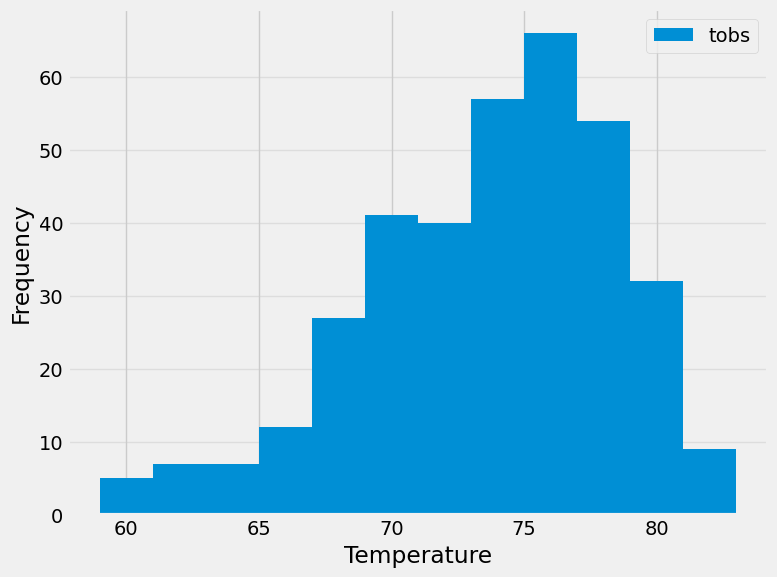

In [88]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent = '2017-08-18'
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 18) - dt.timedelta(days=365)

temperature_data = session.query(Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').\
                filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_temp = pd.DataFrame(temperature_data, columns=['Temperature'])

# Sort the dataframe by temperature
df_temp = df.sort_values(by='Temperature')

plt.figure(figsize=(8, 6))
plt.hist(df_temp, bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# Close Session

In [89]:
# Close Session
session.close()